# Using the same code as before, please solve the following exercises
    3. Change the loss function. An alternative loss for regressions is the Huber loss. 
    The Huber loss is more appropriate than the L2-norm when we have outliers, as it is less sensitive to them (in our example we don't have outliers, but you will surely stumble upon a dataset with outliers in the future). The L2-norm loss puts all differences *to the square*, so outliers have a lot of influence on the outcome. 
    The proper syntax of the Huber loss is tf.losses.huber_loss(labels, predictions).
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

## Solution

Find the line where we define the mean_loss, and change it from:

mean_loss = tf.losses.mean_squared_loss(labels=targets, predictions=outputs) / 2.

to

mean_loss = tf.losses.huber_loss(labels=targets, predictions=outputs)

You can keep the division by 2, so it is easier to compare the two methods. Not compulsory.
 
Some takeaways:
1. Any function that has the property to be lower for better results and higher for worse results can be a loss function.
This includes the Huber loss.
2. Almost everything seems identical.
3. The values of the loss are generally lower (because of the Huber loss formula, and the convexity of the two functions).
4. For our problem, both the L2-norm loss and the Huber loss work equally well. 
5. Generally, the Huber loss is used when we have a lot of outliers.

### Import the relevant libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\ten

### Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [2]:

observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

<i/>Note: This intro is just the basics of TensorFlow which has way more capabilities and depth than that.<i>

In [4]:

input_size = 2
output_size = 1

### Outlining the model

In [5]:

inputs = tf.compat.v1.placeholder(tf.float32, [None, input_size])
targets = tf.compat.v1.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random.uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [6]:

mean_loss = tf.compat.v1.losses.huber_loss(labels=targets, predictions=outputs) / 2.


optimize = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Prepare for execution

In [7]:

sess = tf.compat.v1.InteractiveSession()

### Initializing variables

In [8]:

initializer = tf.compat.v1.global_variables_initializer()

sess.run(initializer)

### Loading training data

In [9]:

training_data = np.load('TF_intro.npz')

### Learning

In [10]:

for i in range(100): 
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

8.411619
8.143058
7.8755426
7.6090956
7.3439083
7.080166
6.8180656
6.557961
6.3
6.0444884
5.7919707
5.542924
5.297563
5.056416
4.8197656
4.5875034
4.359758
4.136864
3.9190998
3.7071872
3.5021124
3.3052363
3.1191099
2.9472232
2.7923114
2.6549444
2.5363867
2.437219
2.3550336
2.287213
2.232503
2.1888804
2.1537046
2.12488
2.100941
2.0805633
2.0627851
2.0467558
2.031886
2.0178144
2.0043044
1.9911749
1.9783108
1.9656315
1.9530796
1.9406159
1.9282159
1.9158638
1.9035482
1.8912598
1.8789915
1.8667388
1.8544978
1.8422667
1.8300431
1.817826
1.8056141
1.7934062
1.781202
1.7690012
1.7568027
1.7446071
1.7324136
1.7202224
1.7080332
1.6958461
1.6836609
1.671478
1.6592966
1.6471179
1.6349406
1.6227659
1.610593
1.5984219
1.586253
1.5740858
1.5619204
1.5497566
1.5375947
1.5254349
1.5132761
1.5011194
1.4889646
1.4768115
1.464661
1.4525118
1.4403647
1.4282205
1.416079
1.4039416
1.3918103
1.3796853
1.3675666
1.3554535
1.3433466
1.3312466
1.3191534
1.3070673
1.2949877
1.2829156


### Plotting the data

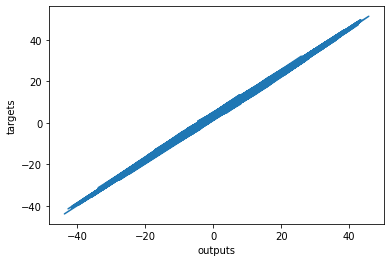

In [11]:

out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()